<center><h1><b>Lecture 20</b></h1></center>
<center><h1><b>Randomized Trials and Hypothesis Checking</b></h1></center>

<center><h2>Chieh-En Lee (李杰恩)</h2></center>

<center>
<h4><a href="mailto:celee@nycu.edu.tw">celee@nycu.edu.tw</a></h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2025 Spring</h5></center>



## Last Time

- Point Estimation
- Maximum Likelihood Estimation
- Interval Estimation
    * Interval Estimation with Known Variance
    * Interval Estimation with Unknown Variance
- Confidence Interval for Normal Samples


## **Today**

<ul>
  <li><a href="#tag1">General Setting for Hypothesis Checking</a></li>
  <li><a href="#tag2">Hypothesis Testing for the Mean</a></li>
  <li><a href="#tag3">One-sided and Two-sided Tests</a></li>
  <li><a href="#tag4">P-values</a></li>
  <li><a href="#tag5">One-sample and Two-sample tests</a></li>
</ul>


## **Introduction**

> Once upon a time...
>
> 這個世界的某處，在一個亞熱帶的島嶼上有著一個國家，上面住著大概兩千萬左右的南方島國子民，一直以來過著呼呼嘿嘿安安穩穩的日子，直到近80年前的某一天，基於人道考量，他們接納了從島嶼西方那塊大陸湧入的上百萬難民，伴隨著他們而來的是一個名為吃人夠夠的病毒，這個病毒會抑制身體的生長激素，導致這個南方島國子民下一代的平均身高下降了15cm，來到了170cm，讓他們在跟其他民族交流的時候都得抬頭90度仰望對方，一直以來都讓這個國家的執政者非常地困擾。
>
> 某一天，這個國家的領導人與政府機構突然收到了一項資訊，某位科學家宣稱，只要讓小朋友在青春期的時候，注射三劑他所開發的特殊疫苗，就可以有效抑制吃人夠夠病毒、促進身體成長、使身材變得更加高大，並附上對應的第三期臨床實驗結果。請問，如果你是這個國家的領導階層，你該怎麼判斷這個科學家提供之實驗結果是具有統計意義的呢？

### Randomized Trial of **吃人夠夠 Vaccine**

The scientist persuaded 200 teenagers who lived in this southern island country to participate in his randomized trial of 吃人夠夠 vaccine. The scientist then divided them randomly into two groups: treatment and control. 

Each member of **treatment group** received 3 doses of 吃人夠夠 vaccination. Members of the **control group** were told that they were being given 3 doses of 吃人夠夠 vaccination, but were instead given 3 doses of normal saline. By the time that these 200 teenagers were 20 years old, the scientist measured their body height and got this result.

<center><img align="center" height=300px width=auto src="./assets/fig01.png"></center>

The scientist is elated about the result of his clinical trial, which shows that the mean body height of the treatment group is $172.83$ cm, and that of the control group is $170.24$ cm. However, a statistician points out that it was almost inevitable that one of the two groups would have a higher mean than the other, and **perhaps the difference in means is merely a random occurrence**. So, **how does the scientist check the statistical significance of her/his trial**?


#### Review: Central Limit Theorem

Given a set of sufficiently large samples drawn from the same population, **the sample means will be approximately normally distributed**.

<center><img align="center" height=300px width=auto src="./assets/fig02.png"></center>

1. This normal distribution will **have a mean close to the means of the population**.

2. The variance of the sample means will be **close to the variance of the population divided by the sample size**.

$$
\begin{aligned}

\mathbb{E} [\bar{X}] &= \mathbb{E} [X] \\
\text{Var} [\bar{X}] &= \frac{\text{Var} [X]}{n}

\end{aligned}
$$

### Check The Probability

We can check that,

1. What is the probability of **the sample mean (mean of treatment group) within the range of 95% confidence interval**?

2. What is the probability of **the sample mean (mean of treatment group) equal to the population mean (mean of control group)**?


Control Group, (Mean, STD) = (170.34, 6.10)
Treatment Group, (Mean, STD) = (172.13, 4.16)


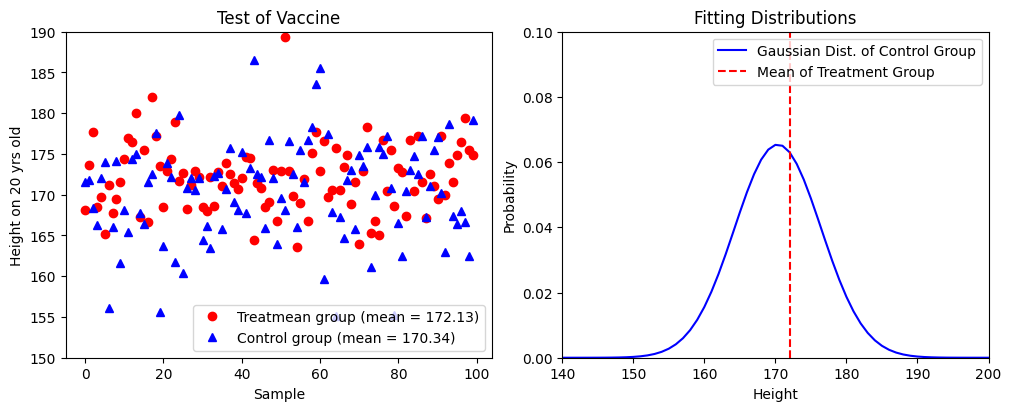

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basicFuncs import gaussDist, calProb

data = np.load("./data/example1.npz")
treatmentHeights, controlHeights = data["treatmentHeights"], data["controlHeights"]
mTreat, sTreat = np.mean(treatmentHeights), np.std(treatmentHeights)
mControl, sControl = np.mean(controlHeights), np.std(controlHeights)

print("Control Group, (Mean, STD) = ({:.02f}, {:.02f})".format(mControl, sControl))
print("Treatment Group, (Mean, STD) = ({:.02f}, {:.02f})".format(mTreat, sTreat))

fig = plt.figure(figsize=(10,4), dpi=100, layout="constrained", facecolor="w")
    
ax1 = fig.add_subplot(121)

ax1.plot(treatmentHeights, 'ro', label="Treatmean group (mean = {:.02f})".format(mTreat))
ax1.plot(controlHeights, 'b^', label="Control group (mean = {:.02f})".format(mControl))
ax1.set_title("Test of Vaccine")
ax1.set_xlabel("Sample")
ax1.set_ylabel("Height on 20 yrs old")
ax1.set_ylim([150, 190])
ax1.legend(loc="best")

x = np.linspace(100, 200, 101)

ax2 = fig.add_subplot(122)
ax2.plot(x, gaussDist(x, mu=mControl, sigma=sControl), 'b', label="Gaussian Dist. of Control Group")
ax2.vlines(mTreat, ymin=0, ymax=0.1, colors='r', linestyles='dashed', label="Mean of Treatment Group")
ax2.set_title("Fitting Distributions")
ax2.set_xlabel("Height")
ax2.set_ylabel("Probability")
ax2.set_xlim([140, 200])
ax2.set_ylim([0, 0.1])
ax2.legend(loc="best")
    
plt.show()

As a result, we found that,

1. It is difficult to analyze this if we directly check the position of treatment group in the probability density function of control group.

2. How do we do this with reasonable approach?

### Check the Difference

In this case, what we want to check is whether the sample mean

$$
\bar{X} = \frac{X_1 + X_2 + \dots + X_n}{n}
$$

is equal to a target value $\mu_0$ or not, i.e., $\bar{X} = \mu_0$ or $\bar{X} \neq \mu_0$.

Therefore, a more appropriate approach is to check this based on **the probability of this difference value occurring**. For convenience, we define a new random variable $Z$ as followed

$$
Z = \frac{\bar{X} - \mu_0}{\sigma_{\bar{X}}} = \frac{\bar{X} - \mu_0}{\frac{\sigma_X}{\sqrt{n}}} = \frac{\bar{X} - \mu_0}{\frac{S}{\sqrt{n}}},
$$

where the random variable $Z$ follows a standard normal distribution $Z \sim N(0, 1)$.

#### Result of Checking the Difference

By calculating **the $z$-value (standard score)**, we have

$$
Z = \frac{\bar{X} - \mu_0}{\frac{S}{\sqrt{n}}} = \frac{172.13 - 170}{\frac{5.5}{\sqrt{100}}} = 3.865
$$

By substituting this result into a normal distribution with $\mu = 0$ and $\sigma = 1$, we can get the probability of getting a sample mean $\bar{X}$ that is equal to $172.13$ cm from $N(0, 1)$ is about $0.00011$.

<center><img align="center" height=300px width=auto src="./assets/fig04.png"></center>

Therefore, we can conclude that **it is nearly impossible to get $100$ samples with $172.13$ sample mean from the original population**. We can also **claim that the 吃人夠夠 vaccine does have statistical significance**. 



z-value = 3.865
Probability = 0.00011


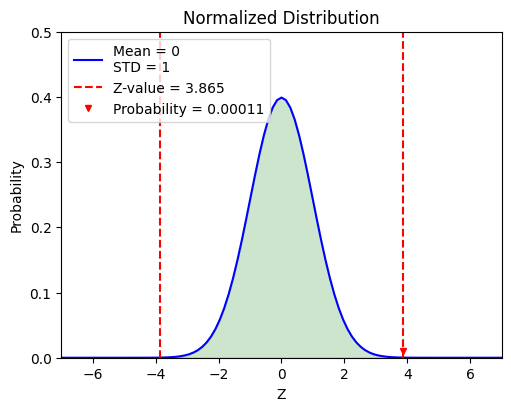

In [2]:
from scripts.testFuncs import test1

test1(target=170, pVar=5.5)

### Brief Summary

What have we learned in this example?

1. Start a randomized trial for 吃人夠夠 vaccine and we have the data from the treatment and control groups.
    
2. We **assume that the mean height of treatment group should be 170 cm**, same as the control group because they are from the same population.
    
3. Calculate the **$z$-value (the standarized difference between sample mean $\bar{X}$ and target value $\mu_0$) and check the probability** of getting a mean height that is equal to $172.13$ cm.
    
4. **Reject the assumption** if that probability is low ($p = 0.00011$).
    

<br>

<center><h4><font color="#FFFF00">The entire process is known as the "hypothesis checking."</font></h4></center>


- - -

#### Example 5.1

We have a coin and we would like to check whether it is fair or not. Let $\theta$ be the probability of head, $\theta = P(Head)$. We have two hypotheses:

1. $H_0$ (the **null hypothesis**): $\theta = \theta_0 = \frac{1}{2}$

2. $H_1$ (the **alternative hypothesis**): $\theta \neq \theta_0$, i.e., $\theta \neq \frac{1}{2}$

Dr. Wei starts a trial by flipping this coin $n$ times and getting $X$ heads. This means that $X \sim Binomial(n, \theta)$. If $H_0$ is true, then she knows that $X$ will be close the $\frac{n}{2}$. Thus, she defines a threshold $t$ and

1. If $|X - \frac{n}{2}| \leq t$, she accepts $H_0$.

2. If $|X - \frac{n}{2}| \gt t$, she accepts $H_1$.

The question becomes, how does Dr. Wei define the threshold $t$? Intuitively, she would like to avoid a situation that the experimental result tells her accept $H_1$ while $H_0$ is true. That is

$$
P \Big( \text{Type I Error} \Big) = P \Big( |X - \frac{n}{2}| \gt t \Big| H_0 \text{ is true} \Big) \leq \alpha,
$$

where the parameter $\alpha$ is called the level of significance.

If $n$ is large, by the CLT we have

$$
\begin{aligned}
Y &= \frac{X - n \theta_0}{\sqrt{n \theta_0 (1 - \theta_0)}} \\
    &= \frac{X - n/2}{\sqrt{n}/2} \sim N(0, 1)
\end{aligned}
$$

This result implies that, instead of looking at $X$ directly, Dr. Wei should focus on $Y$

$$
\begin{aligned}
\implies P \Big( \text{Type I Error} \Big)
    &= P \Big( |X - \frac{n}{2}| \gt t \Big| H_0 \Big) \\
    &= P \Big( |\frac{X - \frac{n}{2}}{\sqrt{n}/2}| \gt \frac{t}{\sqrt{n}/2} \Big| H_0 \Big) \\
    &= P \Big( |Y| \gt \frac{2t}{\sqrt{n}} \Big| H_0 \Big) \\
    \alpha &= 1 - P \Big( -\frac{2t}{\sqrt{n}} \leq Y \leq \frac{2t}{\sqrt{n}} \Big)
\end{aligned}
$$

If we define $\alpha = 0.05$, then

$$
\begin{aligned}
\frac{2t}{\sqrt{n}} &= z_{0.025} = 1.96 \\
    t &= 0.98 \sqrt{n}.
\end{aligned}
$$

Finally, Dr. Wei concludes that we should accept $H_0$ if 

$$
|X - \frac{n}{2}| \leq 0.98 \sqrt{n},
$$

otherwise reject $H_0$ and accept $H_1$.

- - -

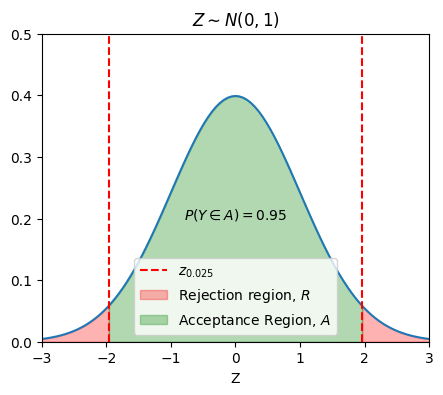

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = 0.05
x = np.linspace(-3, 3, 101)
y = norm.pdf(x)

fig = plt.figure(figsize=(5,4), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.vlines(
    x=[-1.96, 1.96],
    ymin=[0, 0],
    ymax=[1, 1],
    colors=["r", "r"],
    linestyles=["--", "--"],
    label=r"$z_{0.025}$"
)
ax.fill_between(
    x=np.linspace(np.min(x), -1.96, 10),
    y1=np.zeros_like(np.linspace(np.min(x), -1.96, 10)),
    y2=norm.pdf(np.linspace(np.min(x), -1.96, 10)),
    color="r",
    alpha=0.3,
    label=r"Rejection region, $R$",
)
ax.fill_between(
    x=np.linspace(1.96, np.max(x), 10),
    y1=np.zeros_like(np.linspace(1.96, np.max(x), 10)),
    y2=norm.pdf(np.linspace(1.96, np.max(x), 10)),
    color="r",
    alpha=0.3,
)
ax.fill_between(
    x=np.linspace(-1.96, 1.96, 50),
    y1=np.zeros_like(np.linspace(-1.96, 1.96, 50)),
    y2=norm.pdf(np.linspace(-1.96, 1.96, 50)),
    color="g",
    alpha=0.3,
    label=r"Acceptance Region, $A$",
)
ax.text(
    x=0,
    y=0.2,
    s=r"$P(Y \in A) = 0.95$",
    ha="center",
)
ax.set(
    xlim=[np.min(x), np.max(x)],
    ylim=[0, 0.5],
    title=r"$Z \sim N(0, 1)$",
    xlabel="Z",
)
ax.legend()
plt.show()

<a id="tag1"></a>

## **General Setting for Hypothesis Checking**

Let $X_1 + X_2 + ... + X_n$ be a random sample of interest. A **statistic** is a real-value function of the data. For example, the sample mean 

$$
\theta = W(X_1 + X_2 + ... + X_n) = \frac{X_1 + X_2 + ... + X_n}{n}
$$

is a statistic. A **test statistic** is a statistic based on which we build our test.

State a **null hypothesis**, $H_0$ and an **alternative hypothesis**, $H_1$. The alternative hypothesis is a hypothesis that can be true only if the null hypothesis is false. To decide whether to choose $H_0$ or $H_1$, we choose a test statistic $W$. We can define the set $A \in \Reals$ as the set of possible values of $W$ for which we would accept $H_0$. The set $A$ is called **acceptance region**, while $R = \Reals - A$ is said to be the **rejection region**.

There are two possible errors that we can make.

|            |$H_0$ is `True`|$H_1$ is `True`|
|:----------:|:-------------:|:-------------:|
|Accept $H_0$|       X       | Type II Error |
|Accept $H_1$| Type I Error  |       X       |

1. **Type I Error**: reject $H_0$ while $H_0$ is true.

$$
\begin{aligned}
P \Big( \text{Type I Error} \big| \theta \Big) 
    &= P \Big( \text{Reject } H_0 \big| \theta \Big) \\
    &= P \Big( W \in R \big| \theta \Big) \text{, for } \theta \in S_0.
\end{aligned}
$$

If $P \Big( \text{Type I Error} \Big) \leq \alpha$ for all $\theta \in S_0$, then we say **the test has significance level $\alpha$** or simply **the test is a level $\alpha$ test**.

2. **Type II Error**: accept $H_0$ while $H_0$ is false.

Since the alternative hypothesis $H_1$ is usually a composite hypothesis (it may include more than one value of $\theta$), the probability is usually a function of $\theta$.

$$
\begin{aligned}
\beta (\theta) 
    &= P \Big( \text{Type II Error} \big| \theta \Big) \\
    &= P \Big( \text{Accept } H_0  \big| \theta \Big) \text{, for } \theta \in S_1.
\end{aligned} 
$$


- - -

#### Example 5.2

Let $X$ be the received signal. Suppose that we know

$$
X = \begin{cases}
    W, & \text{ if no aircraft is present} \\
    1 + W, & \text{ if an aircraft is present}
\end{cases}.
$$

where $W \sim N(0, \sigma^2 = \frac{1}{9})$. We can write $X = \theta + W$, where $\theta = 0$ if there is no aircraft and $\theta = 1$ if there is an aircraft. So we define our hypotheses as follows:

- $H_0$ (null hypothesis): no aircraft is present
- $H_1$ (alternative hypothesis): an aircraft is present

1. Write $H_0$ and $H_1$ in terms of possible values of $\theta$.
2. Design a level $0.05$ test ($\alpha = 0.05$) to decide between $H_0$ and $H_1$.
3. Find the probability of type II error $\beta$ for the above test. Note that this is the probability of missing a present aircraft.
4. If we observe $X = 0.6$, is there enough evidence to reject $H_0$ at significance level $\alpha = 0.01$?
5. If we would like the probability of missing a present aircraft to be less than $5 \%$, what is the smallest significance level that we can achieve?

- - -

Solution 5.2.1:

$$
H_0: \theta = 0 \\
H_1: \theta = 1
$$

Solution 5.2.2:

Under $H_0$, $X = 0 + W \sim N(0, \sigma^2 = \frac{1}{9})$, under $H_1$, $X = 1 + W \sim N(1, \sigma^2 = \frac{1}{9})$. If the observed value of $X$ is less than $c$, we choose $H_0$, otherwise we choose $H_1$.

$$
\begin{aligned}
\alpha = P \Big( \text{Type I Error} \Big)
    &= P \Big( \text{Reject } H_0 \big| H_0 \Big) \\
    &= P \Big( X \gt c \big| H_0 \Big) \\
    &= P \Big( W \gt c \Big) \\
    &= 1 - P \Big( W \leq c \Big) \\
    &= 1 - \Phi (3 c)
\end{aligned}
$$

where $\Phi (x)$ is the cummulative density function (CDF) of standard normal $N(0, 1)$.

For a level $\alpha = 0.05$ test,

$$
c = \frac{1}{3} \Phi^{-1}(1 - \alpha) = \frac{1}{3} \Phi^{-1}(0.95) \approx 0.548
$$

Solution 5.2.3:

In this case, $H_1$ is simple hypothesis (we only have one case: $\theta = 1$).

$$
\begin{aligned}
\therefore \beta = P \Big( \text{Type II Error} \Big)
    &= P \Big( \text{Accept } H_0 \big| H_1 \Big) \\
    &= P \Big( X \lt c \big| H_1 \Big) \\
    &= P \Big( 1 + W \lt c \Big) \\
    &= P \Big( W \lt c - 1 \Big) \\
    &= \Phi \Big[ 3 (c - 1) \Big] \\
\because c \approx 0.548 \\ 
\therefore \beta \approx 0.088
\end{aligned}
$$

Solution 5.2.4:

For a level $\alpha = 0.01$ test,

$$
c = \frac{1}{3} \Phi^{-1}(1 - \alpha) = \frac{1}{3} \Phi^{-1}(0.99) \approx 0.775 \gt 0.6.
$$

We cannot reject $H_0$ at significance level $\alpha = 0.01$.

Solution 5.2.5:

Missing a present aircraft means the type II error. So what we want is $\beta \leq 0.05$.

$$
\begin{aligned}
\because \beta &= \Phi \Big[ 3 (c - 1) \Big] \\
\implies c &= \frac{1}{3} \Phi^{-1}(\beta) + 1 \approx 0.452 \\
\implies c &\leq 0.452 \text{ for } \beta \leq 0.05
\end{aligned}
$$

In this case ($c \leq 0.452$), $P \Big( \text{Type I Error} \Big) \geq 1 - \Phi (3c) \approx 0.088$. So the smallest significance level we can achieve is $\alpha = 0.088$. This result also implies that the probabilities of type I error $\alpha$ and type II error $\beta$ is a trade-off.



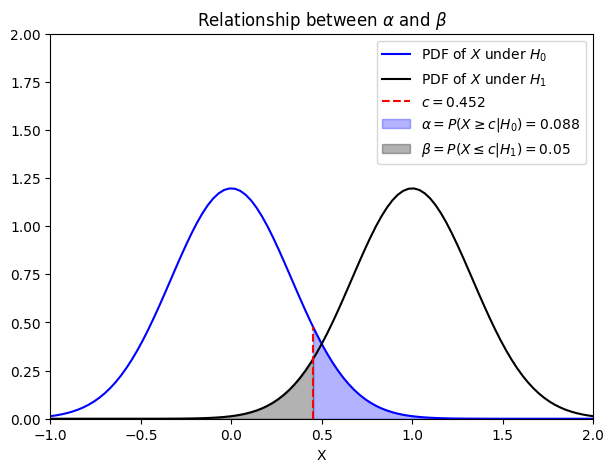

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

c = 0.452
x = np.linspace(-1, 2, 101)
h0 = norm.pdf(x, loc=0, scale=1/3)
h1 = norm.pdf(x, loc=1, scale=1/3)

fig = plt.figure(figsize=(7,5), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
ax.plot(x, h0, 'b', label=r"PDF of $X$ under $H_0$")
ax.plot(x, h1, 'k', label=r"PDF of $X$ under $H_1$")
ax.vlines(
    x=c,
    ymin=0,
    ymax=norm.pdf(c, loc=0, scale=1/3),
    colors="r",
    linestyles="--",
    label=r"$c = 0.452$"
)
ax.fill_between(
    x=np.linspace(c, np.max(x), 50),
    y1=np.zeros_like(np.linspace(c, np.max(x), 50)),
    y2=norm.pdf(np.linspace(c, np.max(x), 50), loc=0, scale=1/3),
    color="b",
    alpha=0.3,
    label=r"$\alpha = P(X \geq c | H_0) = 0.088$",
)
ax.fill_between(
    x=np.linspace(np.min(x), c, 50),
    y1=np.zeros_like(np.linspace(np.min(x), c, 50)),
    y2=norm.pdf(np.linspace(np.min(x), c, 50), loc=1, scale=1/3),
    color="k",
    alpha=0.3,
    label=r"$\beta = P(X \leq c | H_1) = 0.05$",
)
ax.set(
    xlim=[np.min(x), np.max(x)],
    ylim=[0, 2],
    title=r"Relationship between $\alpha$ and $\beta$",
    xlabel="X",
)
ax.legend()
plt.show()

<a id="tag2"></a>

## **Hypothesis Testing for the Mean**

### 吃人夠夠 vaccine

For our randomized trial of 吃人夠夠 vaccine, **the null hypothesis would be the mean body height of treatment group is $170$ cm**, and **the alternative hypothesis is the mean body height of treatment group is not $170$ cm**.

$$
H_0 : \mu = 170 \\
H_1 : \mu \neq 170
$$

For our randomized trial of 吃人夠夠 vaccine, what we want to check is **the mean body height of treatment group**. Therefore, we use the sample mean to define our **statistic**

$$
\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}.
$$

If we know the variance of $X_i$'s $\text{Var}(X_i) = \sigma^2$, then we define our **test statistic** as the normalized sample mean (under $H_0$: $\mu = \mu_0$)

$$
W(X_1 + X_2 + ... + X_n) = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}.
$$

If we do not know the variance of $X_i$'s

$$
W(X_1 + X_2 + ... + X_n) = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}.
$$

In any case, we will be able to find the distribution of $W$. This allows us to design our tests by calculating error probabilities.



- - -

#### Example 5.3

Let $X_1, X_2, ..., X_n$ be the body height of a random sample from the treatment group, which follows a normal distribution $N(\mu, \sigma^2)$ ($\sigma$ is known). Design a level $\alpha$ test to choose between

$$
\begin{aligned}
& H_0: \text{The mean body height of treatment group is equal to 170 cm, } \mu = \mu_0 = 170, \\
& H_1: \text{The mean body height of treatment group is not equal to 170 cm, } \mu \neq \mu_0.
\end{aligned}
$$

- We define our test statistic as follows

$$
W(X_1, X_2, ..., X_n) = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
$$

- As we know, our test statistic should be a standard normal distribution under $H_0$. Therefore, we can define a threshold $c$. If $|W| \leq c$, we accept $H_0$. To choose $c$, we have

$$
\begin{aligned}
\alpha &= P \Big( |W| > c \big| H_0 \Big) \\
    &= 2 \cdot P \Big( W > c \big| H_0 \Big) \text{  } \Big( \because N(0, 1) \text{ is symmetric} \Big) \\
\implies \frac{\alpha}{2} &= P \Big( W > c \big| H_0 \Big) \\
\implies c &= 1 - \Phi^{-1}(\frac{\alpha}{2}) = z_{\frac{\alpha}{2}}
\end{aligned}
$$

- The result shows that we should accept $H_0$ if 

$$
\Big| \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} \Big| \leq c = z_{\frac{\alpha}{2}}
$$

- - -

#### Example 5.4

Find the probability of type II error $\beta$ as a function of $\mu$. Recall that we assume the treatment group follows a normal distribution $N(\mu, \sigma^2)$.

- We know that

$$
\begin{aligned}
\beta(\mu) &= P \Big( \text{Type II Error} \big| H_1 \Big) \\
    &= P \Big( \text{Accept } H_0 \big| \mu \Big) \\
    &= P \Big( \Big| \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} \Big| \lt z_{\frac{\alpha}{2}} \big| \mu \Big)
\end{aligned}
$$

- If $X_i \sim N(\mu, \sigma^2)$, the $\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$

$$
\begin{aligned}
\therefore \beta(\mu) 
    &= P \Big( \Big| \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} \Big| \lt z_{\frac{\alpha}{2}} \big| \mu \Big) \\
    &= P \Big( \mu_0 - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \leq \bar{X} 
    \leq \mu_0 + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big) \\
    &= 1 - \Bigg[ P \Big( \bar{X} \lt \mu_0 - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big) 
    + P \Big( \bar{X} \gt \mu_0 + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big) \Bigg] \\
    &= 1 - \Bigg[ P \Big( \bar{X} - \mu \lt (\mu_0 - \mu) - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big) 
    + P \Big( \bar{X} - \mu \gt (\mu_0 - \mu) + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big) \Bigg] \\
    &= 1 - \Bigg[ P \Big( \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \lt \frac{(\mu_0 - \mu)}{\sigma / \sqrt{n}} - z_{\frac{\alpha}{2}} \Big) 
    + P \Big( \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \gt \frac{(\mu_0 - \mu)}{\sigma / \sqrt{n}} + z_{\frac{\alpha}{2}} \Big) \Bigg] \\
    &= 1 - \Bigg[ \Phi \Big( \frac{(\mu_0 - \mu)}{\sigma / \sqrt{n}} - z_{\frac{\alpha}{2}} \Big) 
    + 1 - \Phi \Big( \frac{(\mu_0 - \mu)}{\sigma / \sqrt{n}} + z_{\frac{\alpha}{2}} \Big)  \Bigg] \\
    &= \Phi \Big( \frac{\mu_0 - \mu}{\sigma / \sqrt{n}} + z_{\frac{\alpha}{2}} \Big)
    - \Phi \Big( \frac{\mu_0 - \mu}{\sigma / \sqrt{n}} - z_{\frac{\alpha}{2}} \Big)
\end{aligned}
$$



- - -

#### Example 5.5

Let $X_1, X_2, ..., X_n$ be the body height of a random sample from the treatment group, which follows a normal distribution $N(\mu, \sigma^2)$ where $\mu$ and $\sigma$ are unknown. Design a level $\alpha$ test to choose between

$$
\begin{aligned}
& H_0: \text{The mean body height of treatment group is equal to 170 cm, } \mu = \mu_0 = 170, \\
& H_1: \text{The mean body height of treatment group is not equal to 170 cm, } \mu \neq \mu_0.
\end{aligned}
$$

- We define our test statistic as follows

$$
W(X_1, X_2, ..., X_n) = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}
$$

- The result shows that we should accept $H_0$ if 

$$
\Big| \frac{\bar{X} - \mu_0}{S / \sqrt{n}} \Big| \leq c = t_{\frac{\alpha}{2}, n-1}
$$

- - - 

#### Example 5.6

For our randomized trial of 吃人夠夠 vaccine, the null hypothesis would be the mean body height of treatment group is $170$ cm, and the alternative hypothesis is the mean body height of treatment group is not $170$ cm.

$$
H_0 : \mu = 170 \\
H_1 : \mu \neq 170
$$

Based on the observed data, is there enough evidence to reject $H_0$ at significance level $\alpha = 0.05$?



In [5]:
import numpy as np
from scipy.stats import t

data = np.load("./data/example1.npz")

meanTreat = np.mean(data["treatmentHeights"])
sTreat = np.std(data["treatmentHeights"])
alpha = 0.05
n = len(data["treatmentHeights"])
testStatistic = (meanTreat - 170)/(sTreat/np.sqrt(n))
tValue = t.ppf(q=1-alpha/2, df=n-1)

print("Value of test statistic = {:.3f}".format(testStatistic))
print("t-value = {:.3f}".format(tValue))

if testStatistic > tValue:
    print("We should reject the null hypothesis.")
else:
    print("We should accept the null hypothesis.")

Value of test statistic = 5.107
t-value = 1.984
We should reject the null hypothesis.


### Brief Summary

|           Case           |              Test Statistic               |        Acceptance Region        |
|:------------------------:|:-----------------------------------------:|:-------------------------------:|
|$X \sim N(\mu, \sigma^2)$ |$W = \frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$| $ - z_{\frac{\alpha}{2}} \leq W \leq z_{\frac{\alpha}{2}}$ |
|$n$ is large, $X$ is non-normal|$W = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$| $ - z_{\frac{\alpha}{2}} \leq W \leq z_{\frac{\alpha}{2}}$ |
|$X \sim N(\mu, \sigma^2)$, $\sigma$ unknown |$W = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$| $ - t_{\frac{\alpha}{2}, n-1} \leq W \leq t_{\frac{\alpha}{2}, n-1}$ |

<a id="tag3"></a>

## **One-sided and Two-sided Tests**

In the above examples, we have discussed the case of **two-sided test**, which means

$$
\begin{aligned}
& H_0: \text{The mean body height of treatment group is equal to the control group, } \mu = \mu_0 \\
& H_1: \text{The mean body height of treatment group is not equal to the control group, } \mu \neq \mu_0.
\end{aligned}
$$

For a **one-sided test** like,

$$
\begin{aligned}
& H_0: \mu \leq \mu_0 \\
& H_1: \mu \gt \mu_0.
\end{aligned}
$$

We have

|           Case           |              Test Statistic               |        Acceptance Region        |
|:------------------------:|:-----------------------------------------:|:-------------------------------:|
|$X \sim N(\mu, \sigma^2)$ |$W = \frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$| $ W \leq z_{\alpha}$ |
|$n$ is large, $X$ is non-normal|$W = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$| $ W \leq z_{\alpha}$ |
|$X \sim N(\mu, \sigma^2)$, $\sigma$ unknown |$W = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$| $ W \leq t_{\alpha, n-1}$ |

or

$$
\begin{aligned}
& H_0: \mu \geq \mu_0 \\
& H_1: \mu \lt \mu_0.
\end{aligned}
$$

We have

|           Case           |              Test Statistic               |        Acceptance Region        |
|:------------------------:|:-----------------------------------------:|:-------------------------------:|
|$X \sim N(\mu, \sigma^2)$ |$W = \frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$| $ W \geq -z_{\alpha}$ |
|$n$ is large, $X$ is non-normal|$W = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$| $ W \geq -z_{\alpha}$ |
|$X \sim N(\mu, \sigma^2)$, $\sigma$ unknown |$W = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$| $ W \geq -t_{\alpha, n-1}$ |


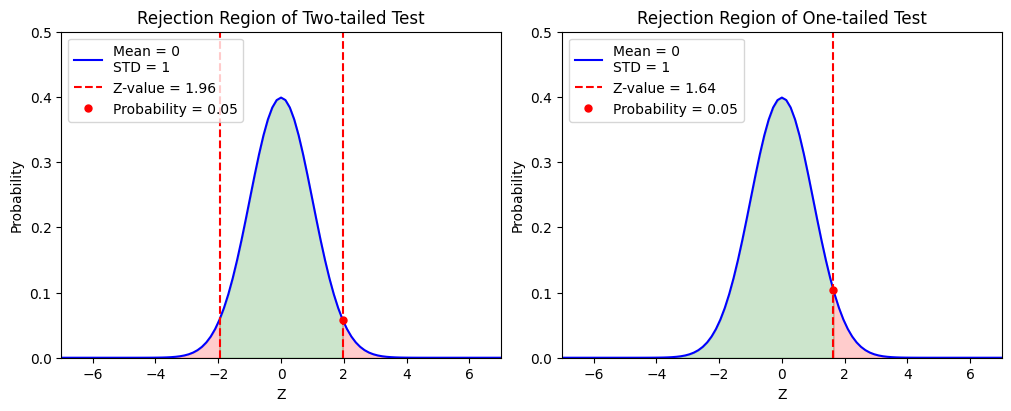

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basicFuncs import gaussDist, calProb

zValue = 1.96
pValue = calProb(zValue)

fig = plt.figure(figsize=(10,4), dpi=100, layout="constrained", facecolor="w")
    
x = np.linspace(-7, 7, 101)
x1 = np.linspace(-7, -zValue, 51)
x2 = np.linspace(-zValue, zValue, 51)
x3 = np.linspace(zValue, 7, 51)

ax = fig.add_subplot(121)
ax.plot(x, gaussDist(x), 'b', label="Mean = {}\nSTD = {}".format(0, 1))
ax.vlines([-zValue, zValue], ymin=0, ymax=0.5, colors='r', linestyles='dashed', label="Z-value = {:.02f}".format(zValue))
ax.plot(zValue, gaussDist(zValue), 'ro', markersize=5, label="Probability = {:.02f}".format(pValue))
ax.fill_between(x1, y1=gaussDist(x1), y2=0, color='r', alpha=0.2)
ax.fill_between(x2, y1=gaussDist(x2), y2=0, color='g', alpha=0.2)
ax.fill_between(x3, y1=gaussDist(x3), y2=0, color='r', alpha=0.2)
ax.set_title("Rejection Region of Two-tailed Test")
ax.set_xlabel("Z")
ax.set_ylabel("Probability")
ax.set_xlim([-7, 7])
ax.set_ylim([0, 0.5])
ax.legend(loc=2)    # upper left

zValue = 1.64
pValue = calProb(zValue, symmetric=False)

x2 = np.linspace(-7, zValue, 51)
x3 = np.linspace(zValue, 7, 51)

ax2 = fig.add_subplot(122)
ax2.plot(x, gaussDist(x), 'b', label="Mean = {}\nSTD = {}".format(0, 1))
ax2.vlines([zValue], ymin=0, ymax=0.5, colors='r', linestyles='dashed', label="Z-value = {:.02f}".format(zValue))
ax2.plot(zValue, gaussDist(zValue), 'ro', markersize=5, label="Probability = {:.02f}".format(pValue))
ax2.fill_between(x2, y1=gaussDist(x2), y2=0, color='g', alpha=0.2)
ax2.fill_between(x3, y1=gaussDist(x3), y2=0, color='r', alpha=0.2)
ax2.set_title("Rejection Region of One-tailed Test")
ax2.set_xlabel("Z")
ax2.set_ylabel("Probability")
ax2.set_xlim([-7, 7])
ax2.set_ylim([0, 0.5])
ax2.legend(loc=2)    # upper left

plt.show()

<a id="tag4"></a>

## **P-values**

In the above discussions, we only reported an "accept" or a "reject" decision as the conclusion of a hypothesis test. However, we can provide more information using what we call $P$-values. In other words, we could indicate how close the decision was. More specifically, suppose we end up rejecting $H_0$ at at significance level $\alpha = 0.05$. Then we could ask: "How about if we require significance level $\alpha = 0.01$?" Can we still reject $H_0$? More specifically, we can ask the following question:

<center>
What is the lowest significance level α that results in rejecting the null hypothesis?
</center>

The answer to the above question is called the $P$-value.

In [7]:
import numpy as np
from scipy.stats import t, norm

data = np.load("./data/example1.npz")
treatmentHeights, controlHeights = data["treatmentHeights"], data["controlHeights"]
mTreat, sTreat = np.mean(treatmentHeights), np.std(treatmentHeights)
alpha = 0.05
n = len(treatmentHeights)
testStatistic = (mTreat - 170)/(sTreat/np.sqrt(n))
tValue = t.ppf(q=1-alpha, df=n-1)
pValue = 1 - norm.cdf(x=testStatistic)

print("The P-Value of 吃人夠夠 Vaccine = {:.10f}".format(pValue))



The P-Value of 吃人夠夠 Vaccine = 0.0000001638


<a id="tag5"></a>

## **One-sample and Two-sample Tests**

Thus far in this lecture, we have looked only at **one-sample tests**, i.e., only the treatment group is taken into consideration during the test.

$$
\begin{matrix}
H_0 : \mu = 170 \\
H_a : \mu \neq 170
\end{matrix}

\text{ or }

\begin{matrix}
H_0 : \mu \gt 170 \\
H_a : \mu \leq 170
\end{matrix}
$$

In general (or in our data), there are treatment and control groups. What we are interesting is whether **the difference in means of these two groups** is statistically significant or not.

$$
\begin{matrix}
H_0 : \mu_{treat} = \mu_{control} \\
H_a : \mu_{treat} \neq \mu_{control}
\end{matrix}

\text{ or }

\begin{matrix}
H_0 : \mu_{treat} \gt \mu_{control} \\
H_a : \mu_{treat} \leq \mu_{control}
\end{matrix}
$$

<center><h4><font color="#FFFF00">This is known as the two-sample test.</font></h4></center>

#### Two-tailed and Two-sample $t$-tests

Let’s assume that **the treatment and control groups are independent**. Usually we have several situations. Here we only discuss these 2:

1. The sample sizes are equal ($𝑛_1 = 𝑛_2 = N$) and these two distributions have the same variance ($s_1 = s_2 = s$).

$$
\begin{aligned}
t &= \frac{\mu_1 - \mu_2}{s_p \cdot \sqrt{\frac{2}{N}}} \\
s_p &= \sqrt{\frac{s_1^2 + s_2^2}{2}} \\
s_i &= \sqrt{\frac{1}{n_i-1} \sum^{n_i}_{j=1}{(X_j - \bar{X})^2}}
\end{aligned}
$$

2. The sample sizes are unequal and these two distributions have the similar variance ($\frac{1}{2} \lt \frac{s_1}{s_2} \lt 2$).

$$
\begin{aligned}
t &= \frac{\mu_1 - \mu_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \\
s_p &= \sqrt{\frac{(n_1 -1) \cdot s_1^2 + (n_2 -1) \cdot s_2^2}{n_1 + n_2 -2}}
\end{aligned}
$$

<center><h4><font color="#FFFF00">Clearly, the trial of 吃人夠夠 vaccine is the second one.</font></h4></center>

<center><img align="center" height=300px width=auto src="./assets/fig12.png"></center>

According to **the result of two-tailed two-sample $t$-test**, we are going to reject the null hypothesis and accept the alternative hypothesis with confidence $98.3 \%$.

t-value = 2.401
Probability = 0.017


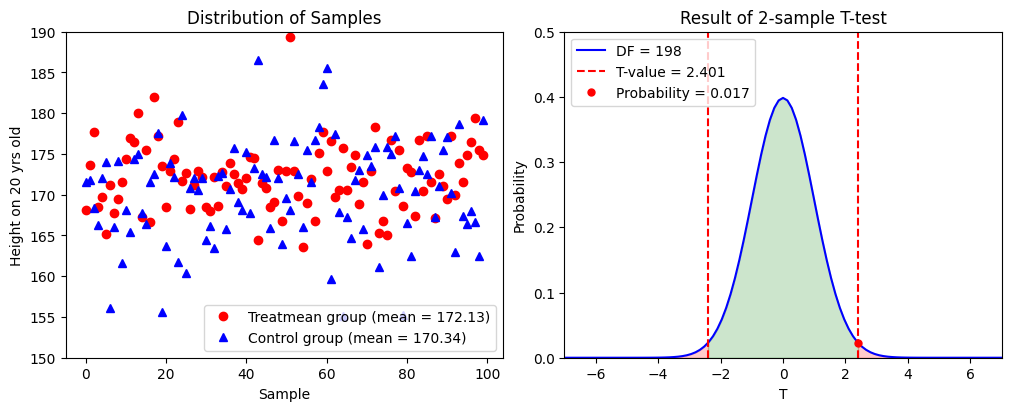

In [8]:
from scripts.testFuncs import test6

test6()

In [9]:
# Scipy results

from scripts.testFuncs import test7

test7()

1-sample T-statistic = 5.081270655581135
1-sample p-value = 1.770143341225191e-06
TtestResult(statistic=5.081270655581135, pvalue=1.770143341225191e-06, df=99)
2-sample T-statistic = 2.4014790438801255
2-sample p-value = 0.01737771481892233
TtestResult(statistic=2.4014790438801255, pvalue=0.01737771481892233, df=174.75813798695754)


## **Summary**

The flowchart of hypothesis checking:

1. Have data.

2. Do you know the parameters of population? Go $t$-test if unknown.
    
3. State the null hypothesis $𝐻_0$ and alternative hypothesis $𝐻_𝑎$ (one-tailed or two-tailed? one-sample or two-sample?). Set a confidence threshold $\alpha$.
    
3. Calculate the standard score ($z$-value or $t$-value) of the test statistic.
    
4. Claim that we can reject the null hypothesis with confidence $\alpha$ if the standard score is in the rejection region and accept the alternative hypothesis with confidence $1 − \alpha$.
    

<br>

<center><h4><font color="#FFFF00">This is an introductory course.<br>
Please take the courses of Statistics for more details.</font></h4></center>